# Chapter 4: Monte Carlo Simulation & Sensitivity Analysis

In [28]:
# Import the random module to generate random numbers
import random

# This variable will count how many points fall inside the quarter circle
inside = 0

# Total number of random points to generate
total = 10000  # More points = more accurate estimate of Pi

# Repeat the simulation for 'total' number of points
for i in range(total):
    # Generate a random x and y coordinate between 0 and 1
    x = random.random()
    y = random.random()

    # Check if the point (x, y) falls inside the quarter circle
    # The equation x^2 + y^2 <= 1 defines the quarter circle with radius 1
    if x*x + y*y <= 1:
        inside += 1  # Count this point as inside the circle

# Estimate the value of Pi using the formula:
# Pi ≈ 4 × (number of points inside the circle / total number of points)
pi = 4 * inside / total

# Print the estimated value of Pi
print("Estimated Pi =", pi)


Estimated Pi = 3.1328


In [ ]:
# Python Code: Create Population and Take Samples
# Import necessary libraries
import random                # For generating random numbers
import numpy as np           # For working with numerical data (like calculating averages)
import matplotlib.pyplot as plt  # For drawing graphs

# Step 1: Create a population of 10,000 random numbers between 0 and 100
# This represents our full dataset (like all the people in a city)
DataPop = [random.uniform(0, 100) for _ in range(10000)]

# Step 2: Prepare an empty list to store the average (mean) of each sample
SamplesMeans = []

# Repeat the sampling process 1000 times
for i in range(1000):
    # Randomly select 100 values from the population (without repeating)
    sample = random.sample(DataPop, k=100)

    # Calculate the average (mean) of this sample
    mean = np.mean(sample)

    # Save the mean to our list of sample means
    SamplesMeans.append(mean)


In [ ]:
# Show Histogram of Sample Means
# Step 3: Plot the histogram of sample means

# Create a histogram (bar chart) to show how the sample means are distributed
plt.hist(SamplesMeans,              # Data to plot: the list of all sample averages
         density=True,              # Normalize the histogram to show probability (area = 1)
         bins=30,                   # Divide data into 30 vertical bars (bins)
         alpha=0.5,                 # Make the bars a little transparent
         color='blue',              # Use blue color for the bars
         edgecolor='black')         # Outline each bar in black

# Add a title to the graph
plt.title("Distribution of Sample Means")

# Label the x-axis and y-axis
plt.xlabel("Sample Mean")
plt.ylabel("Density")

# Add grid lines to make it easier to read
plt.grid(True)

# Show the plot on the screen
plt.show()


In [30]:
# Generate Points
# Import necessary libraries
import random                # To generate random numbers
import matplotlib.pyplot as plt  # To create plots and graphs

# Total number of random points we will generate
N = 10000

# Counter for points that fall under the curve
under_curve = 0

# Lists to store points for plotting (optional but useful to visualize)
x_inside, y_inside = [], []   # Points under the curve (inside the shape)
x_outside, y_outside = [], [] # Points outside the curve (not counted)

# Loop to generate N random (x, y) points in the square [0, 1] × [0, 1]
for i in range(N):
    x = random.uniform(0, 1)  # Random x between 0 and 1
    y = random.uniform(0, 1)  # Random y between 0 and 1

    # Check if the point is under the curve y = sqrt(1 - x^2)
    if y <= (1 - x**2)**0.5:
        under_curve += 1               # Count it as under the curve
        x_inside.append(x)             # Save point for plotting
        y_inside.append(y)
    else:
        x_outside.append(x)            # Save point that is outside
        y_outside.append(y)


Estimated Pi = 3.1532


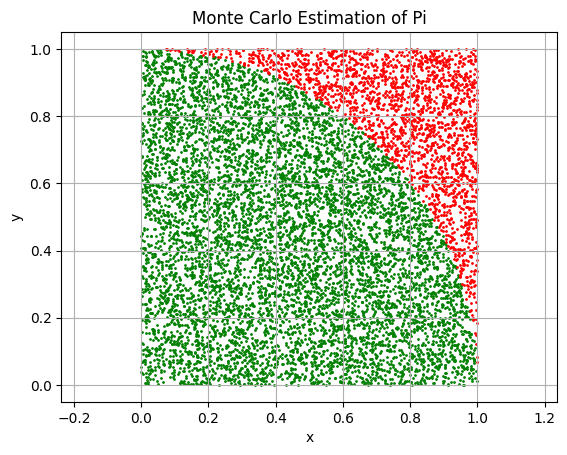

In [31]:
# Estimate the area under the curve (quarter circle)
# This is done by dividing the number of points under the curve by the total number of points
estimated_area = under_curve / N

# Since we are estimating π/4, we multiply by 4 to estimate the value of π
pi_estimate = estimated_area * 4

# Print the result to the screen
print("Estimated Pi =", pi_estimate)

# Optional: Visualize the result using a scatter plot
plt.figure()  # Create a new plot window

# Plot the points under the curve in green
plt.scatter(x_inside, y_inside, color='green', s=1)

# Plot the points outside the curve in red
plt.scatter(x_outside, y_outside, color='red', s=1)

# Add a title to the plot
plt.title("Monte Carlo Estimation of Pi")

# Label the axes
plt.xlabel("x")
plt.ylabel("y")

# Keep the aspect ratio equal (so the circle doesn't look squished)
plt.axis("equal")

# Add grid lines to the plot
plt.grid(True)

# Show the final plot
plt.show()


In [34]:
# Import required libraries
import random                  # For generating random numbers
import numpy as np             # For math functions and arrays
import matplotlib.pyplot as plt  # For plotting graphs

# Define the function to integrate: f(x) = x^2
f = lambda x: x**2

# Define the integration interval [a, b]
a, b = 0.0, 3.0

# Number of random points (higher = more accurate)
NumSteps = 1000000

# Lists to store (x, y) points for plotting
XIntegral, YIntegral = [], []     # Points under the curve
XRectangle, YRectangle = [] , []  # Points above the curve

# Step 1: Find the max value (ymax) of f(x) over [a, b]
ymin, ymax = f(a), f(a)
for i in range(NumSteps):
    x = a + (b - a) * i / NumSteps  # Evenly spaced x values
    y = f(x)
    ymin = min(ymin, y)  # Track min y (optional here)
    ymax = max(ymax, y)  # Track max y (needed for box height)

# Step 2: Define area of rectangle that covers the function
A = (b - a) * (ymax - ymin)  # Rectangle = width × height

# Initialize counter for points under the curve
M = 0

# Step 3: Run Monte Carlo Simulation
for _ in range(NumSteps):
    # Generate a random (x, y) point inside the rectangle
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()

    # Check if point is under the curve y <= f(x)
    if y <= f(x):
        M += 1  # Count it as under the curve
        XIntegral.append(x)
        YIntegral.append(y)
    else:
        XRectangle.append(x)
        YRectangle.append(y)

# Step 4: Estimate the integral using area proportion
Integral = M / NumSteps * A

# Show the result
print("Numerical integration =", Integral)


Numerical integration = 8.993223013526995


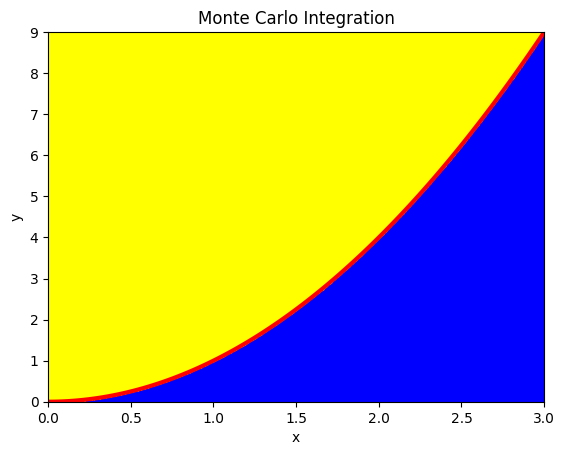

In [36]:
# Step 5: Plotting the results of Monte Carlo Integration

# Create smooth x values for drawing the actual function curve
XLin = np.linspace(a, b, 100)           # 100 points between a and b
YLin = [f(x) for x in XLin]             # Compute f(x) for each point

# Set the axis limits for the plot
plt.axis([0, b, 0, f(b)])               # x from 0 to b, y from 0 to max f(x)

# Plot the actual curve of the function f(x) = x^2 in red
plt.plot(XLin, YLin, color="red", linewidth=3)

# Plot the points under the curve (accepted samples) in blue
plt.scatter(XIntegral, YIntegral, color="blue", s=0.1)

# Plot the points above the curve (rejected samples) in yellow
plt.scatter(XRectangle, YRectangle, color="yellow", s=0.1)

# Add title and axis labels
plt.title("Monte Carlo Integration")
plt.xlabel("x")
plt.ylabel("y")

# Show the final plot
plt.show()


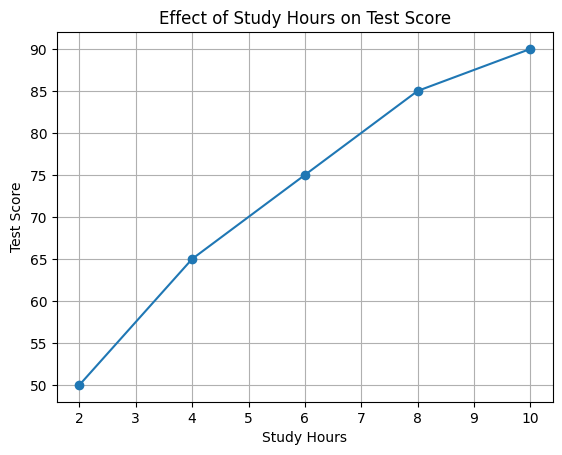

In [37]:
import matplotlib.pyplot as plt  # Import the plotting library

# Define how many hours a student studies
study_hours = [2, 4, 6, 8, 10]

# Corresponding test scores based on study hours
# (This is example data, not collected from real students)
test_scores = [50, 65, 75, 85, 90]

# Create a line plot with points marked using circles
plt.plot(study_hours, test_scores, marker='o')

# Add a title to the chart
plt.title("Effect of Study Hours on Test Score")

# Label the x-axis (horizontal)
plt.xlabel("Study Hours")

# Label the y-axis (vertical)
plt.ylabel("Test Score")

# Show grid lines to make the chart easier to read
plt.grid(True)

# Display the plot
plt.show()


In [39]:
#
from math import log2  # Import logarithm base 2 function

# True probabilities of events (actual outcomes)
p = [0.7, 0.1, 0.1, 0.1]

# Predicted probabilities of events from a model
q = [0.6, 0.2, 0.1, 0.1]

# Function to calculate cross-entropy between true and predicted probabilities
def cross_entropy(p, q):
    # Multiply each true probability by the log2 of predicted probability,
    # sum all these values, and multiply by -1 to get cross-entropy
    return -sum(pi * log2(qi) for pi, qi in zip(p, q))

# Calculate the cross-entropy value
result = cross_entropy(p, q)

# Print the cross-entropy in bits with 3 decimal places
print(f"Cross-Entropy: {result:.3f} bits")


Cross-Entropy: 1.412 bits


Estimated value of π: 3.1516


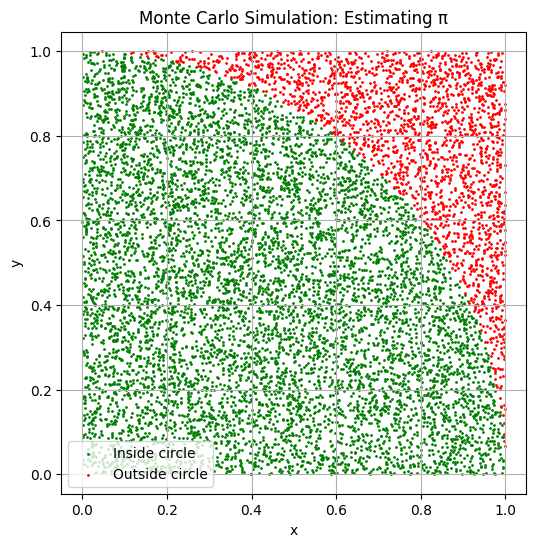

In [32]:
# Estimating $\pi$ using random points in a square!
import random              # For generating random numbers
import matplotlib.pyplot as plt  # For drawing the scatter plot

# Step 1: Set the number of random points to generate
N = 10000  # Try more points (e.g., 100000) for better accuracy

# Counter for how many points fall inside the quarter-circle
inside_circle = 0

# Lists to save points for plotting (optional)
x_inside, y_inside = [], []
x_outside, y_outside = [], []

# Step 2: Generate random points and check if they fall inside the quarter-circle
for i in range(N):
    x = random.uniform(0, 1)  # Random x between 0 and 1
    y = random.uniform(0, 1)  # Random y between 0 and 1

    # Equation of a quarter circle: x² + y² ≤ 1
    if x*x + y*y <= 1:
        inside_circle += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

# Step 3: Estimate Pi using the formula: π ≈ 4 × (points inside / total points)
pi_estimate = 4 * inside_circle / N

# Print the result
print("Estimated value of π:", pi_estimate)

# Step 4: Optional plot to show the points
plt.figure(figsize=(6,6))
plt.scatter(x_inside, y_inside, color='green', s=1, label='Inside circle')
plt.scatter(x_outside, y_outside, color='red', s=1, label='Outside circle')
plt.title("Monte Carlo Simulation: Estimating π")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()


## Central Limit Theorem

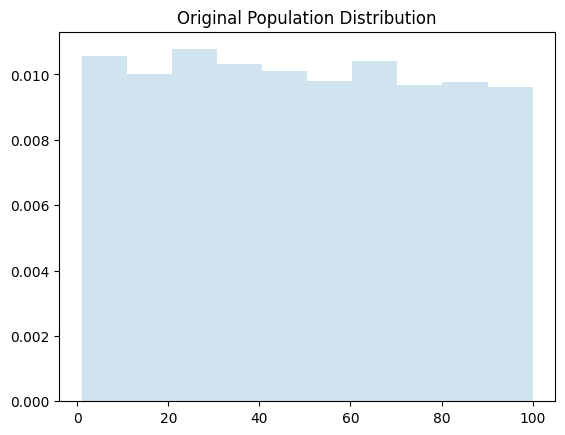

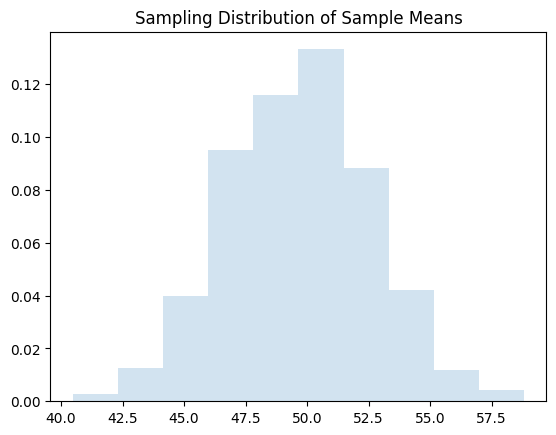

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

a = 1
b = 100
N = 10000
DataPop = list(np.random.uniform(a, b, N))
plt.hist(DataPop, density=True, histtype='stepfilled', alpha=0.2)
plt.title("Original Population Distribution")
plt.show()

SamplesMeans = []
for i in range(1000):
    DataExtracted = random.sample(DataPop, k=100)
    DataExtractedMean = np.mean(DataExtracted)
    SamplesMeans.append(DataExtractedMean)

plt.hist(SamplesMeans, density=True, histtype='stepfilled', alpha=0.2)
plt.title("Sampling Distribution of Sample Means")
plt.show()

## Cross Entropy

P = 1.000 Q = 1.000


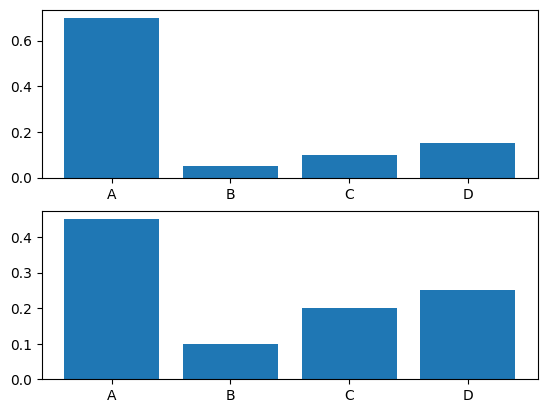

H(P, Q) =  1.505 bits


In [ ]:
from matplotlib import pyplot
from math import log2

events = ['A', 'B', 'C','D']
p = [0.70, 0.05, 0.10, 0.15]
q = [0.45, 0.10, 0.20, 0.25]
print(f'P = {sum(p):.3f}', f'Q = {sum(q):.3f}')

pyplot.subplot(2,1,1)
pyplot.bar(events, p)
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
pyplot.show()

def cross_entropy(p, q):
    return -sum([p*log2(q) for p, q in zip(p, q)])

h_pq = cross_entropy(p, q)
print(f'H(P, Q) =  {h_pq:.3f} bits')

## Cross Entropy Loss Function

In [ ]:
import numpy as np

y = np.array([1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0])
p = np.array([0.8, 0.1, 0.9, 0.2, 0.8, 0.1, 0.7, 0.3, 0.6, 0.4])

ce_loss = -sum(y*np.log(p)+(1-y)*np.log(1-p))
ce_loss = ce_loss/len(p)
print(f'Cross Entropy Loss =  {ce_loss:.3f} nats')

Cross Entropy Loss =  0.272 nats


## Numerical Integration (Monte Carlo Method)

Numerical integration = 8.996787006398996


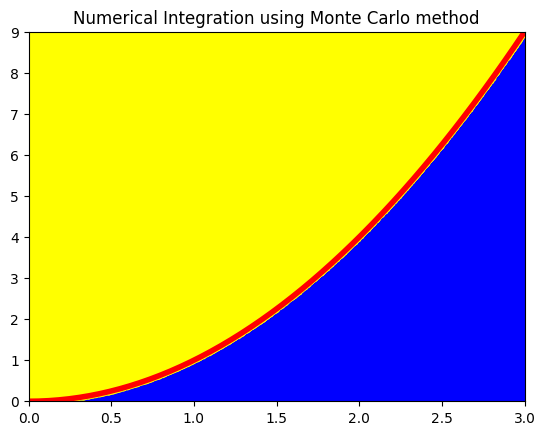

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(2)
f = lambda x: x**2
a = 0.0
b = 3.0
NumSteps = 1000000
XIntegral = []
YIntegral = []
XRectangle = []
YRectangle = []

ymin = f(a)
ymax = ymin
for i in range(NumSteps):
    x = a + (b - a) * float(i) / NumSteps
    y = f(x)
    ymin = min(y, ymin)
    ymax = max(y, ymax)

A = (b - a) * (ymax - ymin)
N = 1000000
M = 0
for k in range(N):
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if y <= f(x):
        M += 1
        XIntegral.append(x)
        YIntegral.append(y)
    else:
        XRectangle.append(x)
        YRectangle.append(y)

NumericalIntegral = M / N * A
print("Numerical integration = " + str(NumericalIntegral))

XLin = np.linspace(a, b)
YLin = [f(x) for x in XLin]

plt.axis([0, b, 0, f(b)])
plt.plot(XLin, YLin, color="red", linewidth=4)
plt.scatter(XIntegral, YIntegral, color="blue", marker=".")
plt.scatter(XRectangle, YRectangle, color="yellow", marker=".")
plt.title("Numerical Integration using Monte Carlo method")
plt.show()

## Sensitivity Analysis (Mockup Only)

In [ ]:
# Example sensitivity function
import numpy as np
import math

def my_func(x_1, x_2, x_3):
    return math.log(x_1/ x_2 + x_3)

x_1 = np.arange(10, 100, 10)
x_2 = np.arange(1, 10, 1)
x_3 = np.arange(1, 10, 1)

print("Run external SensitivityAnalyzer if available with input dict:")
print({'x_1':x_1.tolist(), 'x_2':x_2.tolist(), 'x_3':x_3.tolist()})
print("Function output example:", my_func(20, 2, 3))

Run external SensitivityAnalyzer if available with input dict:
{'x_1': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'x_2': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'x_3': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
Function output example: 2.5649493574615367


# ** The Pi estimation**

N=10000 M=7847 Pi=3.14


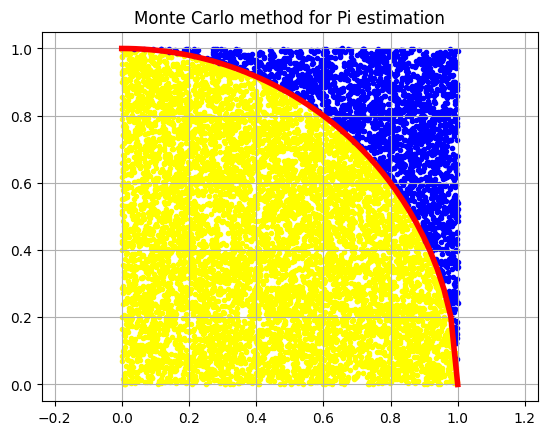

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

N = 10000
M = 0

XCircle=[]
YCircle=[]
XSquare=[]
YSquare=[]

for p in range(N):
    x=random.random()
    y=random.random()
    if(x**2+y**2 <= 1):
        M+=1
        XCircle.append(x)
        YCircle.append(y)
    else:
        XSquare.append(x)
        YSquare.append(y)

Pi = 4*M/N

print("N=%d M=%d Pi=%.2f" %(N,M,Pi))

XLin=np.linspace(0,1)
YLin=[]
for x in XLin:
    YLin.append(math.sqrt(1-x**2))

plt.axis   ("equal")
plt.grid   (which="major")
plt.plot   (XLin , YLin, color="red" , linewidth="4")
plt.scatter(XCircle, YCircle, color="yellow", marker   =".")
plt.scatter(XSquare, YSquare, color="blue"  , marker   =".")
plt.title  ("Monte Carlo method for Pi estimation")

plt.show()